In [124]:
import tensorflow as tf 
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.layers import Dense, Flatten, GlobalMaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, Adam, Adadelta
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import CSVLogger
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [125]:
TRAINING_LOGS_FILE = "/home/bouchra/Project1/code/csv/training_logs_red1.csv"
MODEL_SUMMARY_FILE = "/home/bouchra/Project1/code/Results txt/model_summary_red1.txt"
MODEL_FILE = "/home/bouchra/Project1/code/weights/sain_vs_tum_red1.h5"
BEST_MODEL = "/home/bouchra/Project1/code/weights/Best_Resnet50_red1.hdf5"
# Data
path = "/home/bouchra/Project1/New-data-test/"
training_data_dir = path + 'data_red/training' 
validation_data_dir = path + 'data_red/validation' 
test_data_dir = path + 'data_red/test'
folders = glob('data_red/training/*')


In [126]:
# Hyperparams
IMAGE_SIZE = 512
IMAGE_WIDTH, IMAGE_HEIGHT = IMAGE_SIZE, IMAGE_SIZE
EPOCHS = 50
BATCH_SIZE = 8
TEST_SIZE = 9
dropout_rate = 0.50
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [145]:
#Freezed

Res_net= tf.keras.applications.ResNet50(include_top=False, input_shape=input_shape, pooling='avg',classes=2, weights='imagenet')
for layer in Res_net.layers [:150]:
    layer.trainable = False
for i, layer in enumerate(Res_net.layers):
        print(i, layer.name, "-", layer.trainable)

#model.add(K.layers.Lambda(lambda image: tf.image.resize(image, to_res))) #resizing inputs according to the architecture originale size        
x = Flatten()(Res_net.output)
#x = Dense (512, activation='relu')(x)
#x = Dropout(0.50)(x)
x = BatchNormalization()(x)
x = Dense (2048, activation='relu', kernel_regularizer='l2')(x)
x = Dropout(0.70)(x)

#kernel_regularizer='l2
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=Res_net.input, outputs=prediction)
#model.load_weights(BEST_MODEL)

model.summary()

0 input_25 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2_bn - False
34 conv2_block3_2_relu - False
35 conv2_block3_3_conv -

In [68]:
#Unfreezed
Res_net= tf.keras.applications.ResNet50(include_top=False, input_shape=input_shape, pooling='avg',classes=2, weights='imagenet')
for layer in Res_net.layers [:143]:
    layer.trainable = False
for i, layer in enumerate(Res_net.layers):
        print(i, layer.name, "-", layer.trainable)
x = Flatten()(Res_net.output)
#x = Dense (512, activation='relu')(x)
#x = Dropout(0.50)(x)
x = Dense (2048, activation='relu', kernel_regularizer='l2')(x)
x = Dropout(0.60)(x)
x = Dense (1024, activation='relu')(x)
x = Dropout(0.50)(x)
  
    x = BatchNormalization()(x)
x = Dense (1024, activation='relu')(x)
x = Dropout(0.50)(x)
x = BatchNormalization()(x)
x = Dense (512, activation='relu')(x)
x = Dropout(0.50)(x)
x = BatchNormalization()(x)
x = Dense (256, activation='relu')(x)
x = Dropout(0.50)(x)
prediction = Dense(1, activation='sigmoid')(x)

# create a model object
model = Model(inputs=Res_net.input, outputs=prediction)
#model.load_weights(BEST_MODEL)

model.summary()

0 input_13 - False
1 conv1_pad - False
2 conv1_conv - False
3 conv1_bn - False
4 conv1_relu - False
5 pool1_pad - False
6 pool1_pool - False
7 conv2_block1_1_conv - False
8 conv2_block1_1_bn - False
9 conv2_block1_1_relu - False
10 conv2_block1_2_conv - False
11 conv2_block1_2_bn - False
12 conv2_block1_2_relu - False
13 conv2_block1_0_conv - False
14 conv2_block1_3_conv - False
15 conv2_block1_0_bn - False
16 conv2_block1_3_bn - False
17 conv2_block1_add - False
18 conv2_block1_out - False
19 conv2_block2_1_conv - False
20 conv2_block2_1_bn - False
21 conv2_block2_1_relu - False
22 conv2_block2_2_conv - False
23 conv2_block2_2_bn - False
24 conv2_block2_2_relu - False
25 conv2_block2_3_conv - False
26 conv2_block2_3_bn - False
27 conv2_block2_add - False
28 conv2_block2_out - False
29 conv2_block3_1_conv - False
30 conv2_block3_1_bn - False
31 conv2_block3_1_relu - False
32 conv2_block3_2_conv - False
33 conv2_block3_2_bn - False
34 conv2_block3_2_relu - False
35 conv2_block3_3_conv -

NameError: name 'BatchNormalization' is not defined

In [146]:
model.compile(loss='binary_crossentropy',optimizer=Adadelta(learning_rate=0.001),metrics=['accuracy'])
with open(MODEL_SUMMARY_FILE,"w") as fh:
    model.summary(print_fn=lambda line: fh.write(line + "\n"))

#0.00001

In [147]:
# Data augmentation
training_data_generator = ImageDataGenerator()
validation_data_generator = ImageDataGenerator()
test_data_generator = ImageDataGenerator()

In [148]:
# Data preparation
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode="binary", 
    shuffle=False)

Found 504 images belonging to 2 classes.
Found 468 images belonging to 2 classes.
Found 164 images belonging to 2 classes.


In [149]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(BEST_MODEL,monitor='val_loss',save_best_only=True, save_weights_only=True, mode='min')


In [150]:
# Training
history = model.fit(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[ 
    CSVLogger(TRAINING_LOGS_FILE,
    append=False,
    separator=";"), checkpoint])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 63 steps, validate for 58 steps
Epoch 1/50
63/63 [==============================] - 14s 221ms/step - loss: 21.4799 - accuracy: 0.4722 - val_loss: 21.3110 - val_accuracy: 0.3578
Epoch 2/50
63/63 [==============================] - 11s 174ms/step - loss: 21.4000 - accuracy: 0.5060 - val_loss: 21.3635 - val_accuracy: 0.3750
Epoch 3/50
63/63 [==============================] - 11s 175ms/step - loss: 21.3319 - accuracy: 0.5278 - val_loss: 21.4324 - val_accuracy: 0.3750
Epoch 4/50
63/63 [==============================] - 11s 175ms/step - loss: 21.1816 - accuracy: 0.6210 - val_loss: 21.5036 - val_accuracy: 0.3750
Epoch 5/50
63/63 [==============================] - 11s 176ms/step - loss: 21.1712 - accuracy: 0.6310 - val_loss: 21.5688 - val_accuracy: 0.3707
Epoch 6/50
63/63 [==============================] - 11s 176ms/step - loss: 21.1290 - accuracy: 0.6508 - val_loss: 21.6195 - val_accuracy: 0.3879
Epoch 7/50
63/63 [====================

In [142]:
model.load_weights(BEST_MODEL)
model.save_weights(MODEL_FILE)

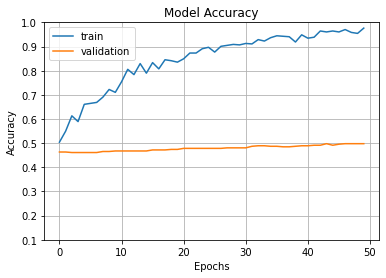

In [143]:
#PlotLossesKeras()
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.1,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

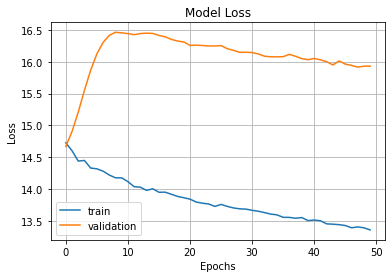

In [144]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()